<a href="https://colab.research.google.com/github/NaxyPython/TP_Python/blob/main/TP6_Boutrin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
# si nécessaire : conda install -c conda-forge opencv
# ou sinon : https://pypi.org/project/opencv-python/
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adadelta
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import files

# Importation du fichier zip contenant les dossiers d'images
uploaded = files.upload()

In [ ]:
import zipfile
import os

# On parcours tous les fichiers zip pour en extraire leurs contenus
for zip_file in uploaded.keys():#boucle sur les clés(i.e fichirs zip) du dictionnaire uploaded.
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:#pour ouvrir les fichiers zip en lecture seule
        zip_ref.extractall(os.path.splitext(zip_file)[0])  #Pour extraire tous les fichiers et dossiers pour les placer dans un dossier portant le nom du fichier zip


In [ ]:
import zipfile

# Chemin du fichier zip contenant les images
chemin_du_fichier_zip = '/content/Animals/Animals/data_animals.zip'

# Extraction des fichiers
with zipfile.ZipFile(chemin_du_fichier_zip, 'r') as zip_ref:
    zip_ref.extractall('/content/Animals/Animals/')


In [ ]:
import os
from PIL import Image

# Chemin du dossier contenant les dossiers d'images
chemin_dossier_images = '/content/Animals/Animals/data_animals'

# Liste des classes (noms des sous-dossiers)
classes = os.listdir(chemin_dossier_images)

# Ici, on parcours les classes
for classe in classes:
    classe_path = os.path.join(chemin_dossier_images, classe)
    if os.path.isdir(classe_path):
        # Puis on parcours les images dans chaque classe
        for image_file in os.listdir(classe_path):
            image_path = os.path.join(classe_path, image_file)
            img = Image.open(image_path)

In [ ]:
input_img_raw = cv2.imread(os.path.join(classe_path, img))
if input_img_raw is not None:
    # Verification si le chargement de l'image a réussi
    input_img_grey = cv2.cvtColor(input_img_raw, cv2.COLOR_BGR2GRAY) if num_channel == 1 else input_img_raw
    input_img_resized = cv2.resize(input_img_grey, (img_rows, img_cols))
    input_img_flatten = input_img_resized.flatten()
    img_data_list.append(input_img_flatten)
else:
    print(f'Impossible de charger l image : {img}')


In [ ]:
img_rows=128
img_cols=128
print(f'le format est:',img_rows*img_cols)

le format est: 16384


In [ ]:
num_channel=1#On a donc plus qu'une seule valeur de pixel par emplacement dans l'image

In [ ]:
import cv2
import os
import numpy as np
from sklearn import preprocessing

# Chemin du dossier contenant les dossiers d'images
data_path = '/content/Animals/Animals/data_animals'

# Liste des classes (noms des sous-dossiers)
data_animals = ['cats', 'dogs', 'horses', 'Humans']

# Nombre de canaux (1 pour échelle de gris, 3 pour RGB)
num_channel = 1

# Dimensions choisit pour les images
img_rows, img_cols = 128, 128

img_data_list = []

# Parcours des classes
for classe in data_animals:
    classe_path = os.path.join(data_path, classe)
    img_list = os.listdir(classe_path)

    print('Loaded the images of dataset-' + '{}\n'.format(classe))
    for img in img_list:
        image_path = os.path.join(classe_path, img)
        input_img_raw = cv2.imread(image_path)
        input_img_grey = cv2.cvtColor(input_img_raw, cv2.COLOR_BGR2GRAY) if num_channel == 1 else input_img_raw
        input_img_resized = cv2.resize(input_img_grey, (img_rows, img_cols))
        input_img_flatten = input_img_resized.flatten()
        img_data_list.append(input_img_flatten)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data_scaled = img_data / 255.0

print(f'Les dimensions de img_data_scaled sont :', img_data_scaled.shape, 'où chaque ligne représente une image et chaque colonne contient les valeurs de pixels de l image')
print(f'Moyenne de img_data_scaled :', np.mean(img_data_scaled))
print(f'Écart type de img_data_scaled :', np.std(img_data_scaled))
print(f'Moyenne des valeurs de pixel pour chaque emplacement dans toutes les images :', img_data_scaled.mean(axis=0))
print(f'Écart type des valeurs de pixel pour chaque emplacement dans toutes les images :', img_data_scaled.std(axis=0))


Loaded the images of dataset-cats

Loaded the images of dataset-dogs

Loaded the images of dataset-horses

Loaded the images of dataset-Humans

Les dimensions de img_data_scaled sont : (808, 16384) où chaque ligne représente une image et chaque colonne contient les valeurs de pixels de l image
Moyenne de img_data_scaled : 0.48933598
Écart type de img_data_scaled : 0.26966083
Moyenne des valeurs de pixel pour chaque emplacement dans toutes les images : [0.51372033 0.5108715  0.5126766  ... 0.5041008  0.50513494 0.5087019 ]
Écart type des valeurs de pixel pour chaque emplacement dans toutes les images : [0.31003124 0.3103272  0.31066677 ... 0.27572963 0.2754025  0.27498004]


In [ ]:
print(f"La dimension du tableau img_data est : {img_data.shape}")

La dimension du tableau img_data est : (808, 16384)


In [ ]:
print(img_data_scaled.shape)

(808, 16384)


In [ ]:
img_data.shape[0]

808

In [ ]:
img_data.shape[0]

808

In [ ]:
img_rows*img_cols

16384

In [ ]:
img_data_reshape=img_data_scaled.reshape(img_data.shape[0],
                                        img_rows,img_cols,
                                        num_channel)
print (img_data_reshape.shape)

(808, 128, 128, 1)


In [ ]:
input_shape=img_data_reshape[0].shape # (128, 128, 1)
input_shape

(128, 128, 1)

In [ ]:
num_of_samples = img_data_reshape.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')
labels[0:202]=0
labels[202:404]=1
labels[404:606]=2
labels[606:]=3

names = ['cats','dogs','horses','humans']

In [ ]:
import os

# Liste des noms de classes (noms de sous-dossiers)
data_dir_list = os.listdir(data_path)

# Noms de classes
print(f'Les classes sont : {data_dir_list}')

# Nombre de classes
num_classes = len(data_dir_list)
print(f'Il y a {num_classes} classes au total.')


Les classes sont : ['Humans', 'dogs', 'cats', 'horses']
Il y a 4 classes au total.


In [ ]:
# Conversion en one-hot encoding
one_hot_labels = np.eye(num_classes)[labels]

In [ ]:
print(one_hot_labels)

In [ ]:
from sklearn.model_selection import train_test_split

# Séparation des données en apprentissage et test, et redimensionement
images_train,images_test,labels_train,labels_test = train_test_split(img_data_scaled, one_hot_labels, test_size=0.2, random_state=42)
images_train = images_train.reshape(images_train.shape[0], img_rows, img_cols, num_channel)
images_test = images_test.reshape(images_test.shape[0], img_rows, img_cols, num_channel)

print("Dimensions de l'ensemble d'apprentissage:",images_train.shape)
print("Dimensions de l'ensemble de test:", images_test.shape)

Dimensions de l'ensemble d'apprentissage: (646, 128, 128, 1)
Dimensions de l'ensemble de test: (162, 128, 128, 1)


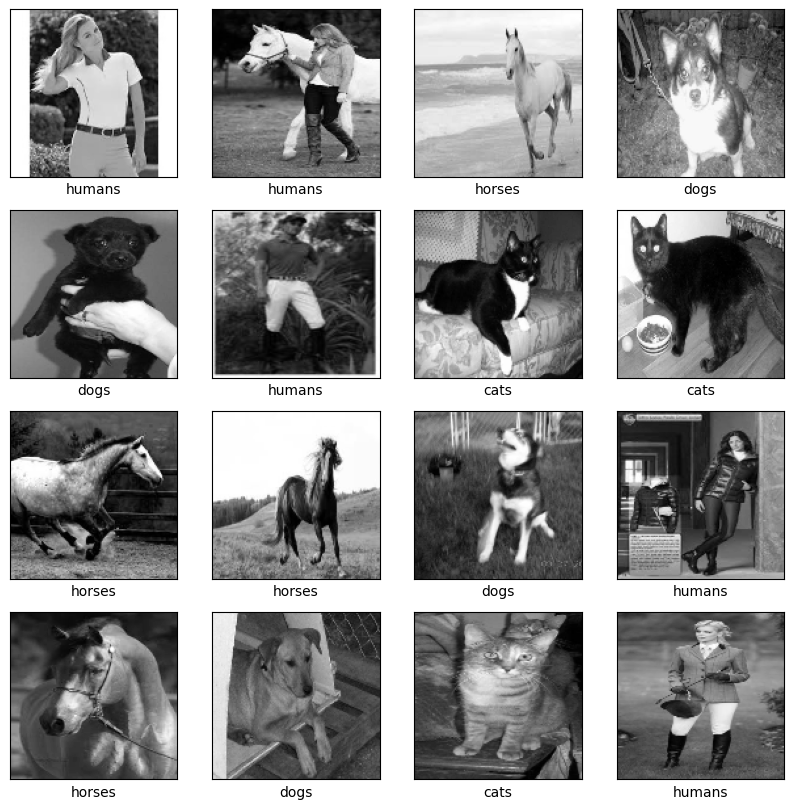

In [ ]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)# 4 fois 4 images
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_train[i].squeeze(), cmap=plt.cm.gray)  # cmap=plt.cm.gray pour les images en niveaux de gris
    plt.xlabel(names[np.argmax(labels_train[i])])  # nom de la classe en fonction de l'encodage "one-hot encoding"
plt.show()

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Activation

# Initialisation du modèle
my_first_CNN = Sequential()

# Première couche de convolution
my_first_CNN.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(img_rows, img_cols, num_channel)))

# Deuxième couche de convolution
my_first_CNN.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu'))

# Troisième couche de convolution
my_first_CNN.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu'))

# Quatrième couche de convolution
my_first_CNN.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu'))

In [ ]:
my_first_CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
Total params: 28064 (109.62 KB)
Trainable params: 28064 (109.62 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print(my_first_CNN.layers[0].input_shape)
print(my_first_CNN.layers[1].input_shape)

(None, 128, 128, 1)
(None, 128, 128, 32)


In [ ]:
# Initialisation du modèle
my_first_CNN_BZ16 = Sequential()

# Première couche de convolution
my_first_CNN_BZ16.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', batch_size=16, input_shape=(img_rows, img_cols, num_channel)))
my_first_CNN_BZ16.add(Activation('relu'))

# Deuxième couche de convolution
my_first_CNN_BZ16.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', batch_size=16))
my_first_CNN_BZ16.add(Activation('relu'))

# Troisième couche de convolution
my_first_CNN_BZ16.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', batch_size=16))
my_first_CNN_BZ16.add(Activation('relu'))

# Quatrième couche de convolution
my_first_CNN_BZ16.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', batch_size=16))
my_first_CNN_BZ16.add(Activation('relu'))

In [ ]:
# Pour acceder à la dernière couche
der_couche = my_first_CNN_BZ16.layers[-1]

#Forme de la sortie de cette couche
dim_couche_cache = der_couche.output_shape
print(f'la dimension de la couche caché est:',dim_couche_cache)

la dimension de la couche caché est: (16, 128, 128, 32)


In [ ]:
#Formes des sorties de chaque couche
for layer in my_first_CNN_BZ16.layers:
    print(layer.output_shape)

(16, 128, 128, 32)
(16, 128, 128, 32)
(16, 128, 128, 32)
(16, 128, 128, 32)
(16, 128, 128, 32)
(16, 128, 128, 32)
(16, 128, 128, 32)
(16, 128, 128, 32)


In [ ]:
my_first_CNN_BZ16.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (16, 128, 128, 32)        320       
                                                                 
 activation (Activation)     (16, 128, 128, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (16, 128, 128, 32)        9248      
                                                                 
 activation_1 (Activation)   (16, 128, 128, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (16, 128, 128, 32)        9248      
                                                                 
 activation_2 (Activation)   (16, 128, 128, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (16, 128, 128, 32)       

In [ ]:
np.shape(my_first_CNN_BZ16.layers[2].get_weights()[0])

(3, 3, 32, 32)

In [ ]:
#Nombre de poids à estimer
nombre_poids = my_first_CNN_BZ16.count_params()

print(f"Le nombre de poids à estimer dans le modèle est : {nombre_poids}")

Le nombre de poids à estimer dans le modèle est : 28064


In [ ]:
#Nombre de paramètres pour les termes de biais
nombre_parametres_biais = my_first_CNN_BZ16.count_params()
nombre_parametres_biais2 = sum([layer.count_params() for layer in my_first_CNN_BZ16.layers if hasattr(layer, 'bias')])

print(f"Le nombre de paramètres de biais à estimer est : {nombre_parametres_biais},",f"ou : {nombre_parametres_biais2}" )

Le nombre de paramètres de biais à estimer est : 28064, ou : 28064


In [ ]:
nombre_parametres_poids_troisieme_couche = len(my_first_CNN_BZ16.layers[2].get_weights()[0].flatten())
print(f"Le nombre de paramètres de poids pour la troisième couche est : {nombre_parametres_poids_troisieme_couche}")

Le nombre de paramètres de poids pour la troisième couche est : 9216


In [ ]:
nombre_parametres_biais_troisieme_couche = len(my_first_CNN_BZ16.layers[2].get_weights()[1])
print(f"Le nombre de paramètres de biais pour la troisième couche est : {nombre_parametres_biais_troisieme_couche}")

Le nombre de paramètres de biais pour la troisième couche est : 32


In [ ]:
# Vérification des poids et des biais après l'initialisation
poids = my_first_CNN_BZ16.layers[0].get_weights()[0]
biais = my_first_CNN_BZ16.layers[0].get_weights()[1]

print("Première couche - Poids (filtres) :")
print(poids)

print("\nPremière couche - Biais :")
print(biais)

Première couche - Poids (filtres) :
[[[[ 0.03675248  0.05996826  0.10508801 -0.03989821 -0.0495539
     0.11724801 -0.05384367 -0.10207067  0.01872177  0.03267746
    -0.02020526  0.04625392  0.01515216  0.07854578  0.09824249
    -0.12339686  0.00559986  0.04115757  0.12178759 -0.01329905
     0.01299797 -0.11159678 -0.00675195  0.12844478  0.07220082
     0.03621624  0.02562001 -0.14132173 -0.03542488  0.10291623
    -0.09039618  0.13038976]]

  [[-0.06558739  0.11666216 -0.00424699 -0.02409634 -0.03970685
    -0.12192154  0.05162056  0.01441157  0.01898809 -0.11127831
    -0.06265353  0.00081283  0.07641986  0.08391495 -0.02865066
     0.13371272  0.0346918  -0.00220983 -0.10429338  0.10010803
     0.05987073  0.06100392 -0.05680108 -0.09747609 -0.02262024
     0.05861369  0.08136804 -0.07770191 -0.13758051  0.08838591
    -0.02808952  0.09629725]]

  [[ 0.04292876  0.12306212  0.03747232  0.09096406 -0.02863779
     0.04399092  0.07155964 -0.06514788 -0.02303153 -0.04067474
    -0.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense

# Initialisation du modèle
my_first_CNN = Sequential()

# Première couche de convolution
my_first_CNN.add(Conv2D(32, (3, 3), padding='same', input_shape=(128, 128, 1)))
my_first_CNN.add(Activation('relu'))

# Deuxième couche de convolution
my_first_CNN.add(Conv2D(32, (3, 3), padding='same'))
my_first_CNN.add(Activation('relu'))

# MaxPooling2D
my_first_CNN.add(MaxPooling2D((2, 2)))

# Dropout
my_first_CNN.add(Dropout(0.5))

# Troisième couche de convolution
my_first_CNN.add(Conv2D(64, (3, 3), padding='same'))
my_first_CNN.add(Activation('relu'))

# MaxPooling2D
my_first_CNN.add(MaxPooling2D((2, 2)))

# Dropout
my_first_CNN.add(Dropout(0.5))

# Aplatissement des données
my_first_CNN.add(Flatten())

# Couche Dense (Fully Connected)
my_first_CNN.add(Dense(64))
my_first_CNN.add(Activation('relu'))

# Dropout
my_first_CNN.add(Dropout(0.5))

# Couche de sortie avec 4 classes et fonction d'activation softmax
my_first_CNN.add(Dense(4, activation='softmax'))

In [ ]:
my_first_CNN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      320       
                                                                 
 activation_4 (Activation)   (None, 128, 128, 32)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 activation_5 (Activation)   (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                      

In [ ]:
# Importation des optimiseurs SGD et Adam
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
print(images_train.shape,labels_train.shape)

(646, 128, 128, 1) (646, 4)


In [ ]:
# Initialisation du modèle
my_first_CNN = Sequential()

# Première couche de convolution
my_first_CNN.add(Conv2D(32, (3, 3), padding='same', input_shape=(128, 128, 1)))
my_first_CNN.add(Activation('relu'))

# Deuxième couche de convolution
my_first_CNN.add(Conv2D(32, (3, 3), padding='same'))
my_first_CNN.add(Activation('relu'))

# MaxPooling2D
my_first_CNN.add(MaxPooling2D((2, 2)))

# Dropout
my_first_CNN.add(Dropout(0.5))

# Troisième couche de convolution
my_first_CNN.add(Conv2D(64, (3, 3), padding='same'))
my_first_CNN.add(Activation('relu'))

# MaxPooling2D
my_first_CNN.add(MaxPooling2D((2, 2)))

# Dropout
my_first_CNN.add(Dropout(0.5))

# Aplatissement des données
my_first_CNN.add(Flatten())

# Couche Dense (Fully Connected)
my_first_CNN.add(Dense(64))
my_first_CNN.add(Activation('relu'))

# Dropout
my_first_CNN.add(Dropout(0.5))

# Couche de sortie avec 4 classes et fonction d'activation softmax
my_first_CNN.add(Dense(4, activation='softmax'))

# Configuration de l'optimiseur SGD
sgd_optimizer = SGD(learning_rate=0.01, momentum=0.9)

# Compilation du modèle avec l'optimiseur SGD
my_first_CNN.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Initialisation du modèle
my_first_CNN = Sequential()

# Première couche de convolution
my_first_CNN.add(Conv2D(32, (3, 3), padding='same', input_shape=(128, 128, 1)))
my_first_CNN.add(Activation('relu'))

# Deuxième couche de convolution
my_first_CNN.add(Conv2D(32, (3, 3), padding='same'))
my_first_CNN.add(Activation('relu'))

# MaxPooling2D
my_first_CNN.add(MaxPooling2D((2, 2)))

# Dropout
my_first_CNN.add(Dropout(0.5))

# Troisième couche de convolution
my_first_CNN.add(Conv2D(64, (3, 3), padding='same'))
my_first_CNN.add(Activation('relu'))

# MaxPooling2D
my_first_CNN.add(MaxPooling2D((2, 2)))

# Dropout
my_first_CNN.add(Dropout(0.5))

# Aplatissement des données
my_first_CNN.add(Flatten())

# Couche Dense (Fully Connected)
my_first_CNN.add(Dense(64))
my_first_CNN.add(Activation('relu'))

# Dropout
my_first_CNN.add(Dropout(0.5))

# Couche de sortie avec 4 classes et fonction d'activation softmax
my_first_CNN.add(Dense(4, activation='softmax'))

# Configuration de l'optimiseur Adam
adam_optimizer = Adam()

# Compilation du modèle avec l'optimiseur Adam
my_first_CNN.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


Epoch 1/10
17/17 [==============================] - 32s 2s/step - loss: 1.6435 - accuracy: 0.2481 - val_loss: 1.3859 - val_accuracy: 0.1923
Epoch 2/10
17/17 [==============================] - 32s 2s/step - loss: 1.3794 - accuracy: 0.2636 - val_loss: 1.3861 - val_accuracy: 0.1923
Epoch 3/10
17/17 [==============================] - 31s 2s/step - loss: 1.3655 - accuracy: 0.2926 - val_loss: 1.3849 - val_accuracy: 0.2077
Epoch 4/10
17/17 [==============================] - 37s 2s/step - loss: 1.3560 - accuracy: 0.2926 - val_loss: 1.3844 - val_accuracy: 0.2308
Epoch 5/10
17/17 [==============================] - 29s 2s/step - loss: 1.3464 - accuracy: 0.3566 - val_loss: 1.3786 - val_accuracy: 0.3308
Epoch 6/10
17/17 [==============================] - 32s 2s/step - loss: 1.3396 - accuracy: 0.3760 - val_loss: 1.3813 - val_accuracy: 0.2846
Epoch 7/10
17/17 [==============================] - 30s 2s/step - loss: 1.2949 - accuracy: 0.4147 - val_loss: 1.3655 - val_accuracy: 0.4154
Epoch 8/10
17/17 [==

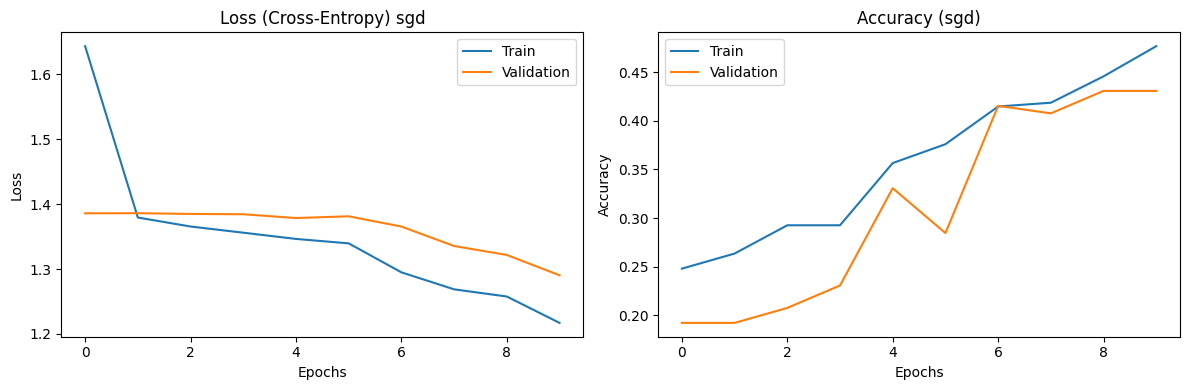

In [ ]:
# Entraînement du modèle
Entr_mod = my_first_CNN.fit(images_train, labels_train, epochs=10, batch_size=32, validation_split=0.2)#one_hot_labels

# Récupération des métriques d'apprentissage
loss_train = Entr_mod.history['loss']
accuracy_train = Entr_mod.history['accuracy']
val_loss = Entr_mod.history['val_loss']
val_accuracy = Entr_mod.history['val_accuracy']

#Graphe du risque de cross-entropy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(loss_train, label='Train')
plt.plot(val_loss, label='Validation')
plt.title('Loss (Cross-Entropy) sgd')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#Graphe de la précision
plt.subplot(1, 2, 2)
plt.plot(accuracy_train, label='Train')
plt.plot(val_accuracy, label='Validation')
plt.title('Accuracy (sgd)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/10
17/17 [==============================] - 26s 2s/step - loss: 1.1408 - accuracy: 0.5019 - val_loss: 1.2688 - val_accuracy: 0.3923
Epoch 2/10
17/17 [==============================] - 27s 2s/step - loss: 1.0494 - accuracy: 0.5562 - val_loss: 1.2324 - val_accuracy: 0.4462
Epoch 3/10
17/17 [==============================] - 26s 2s/step - loss: 1.0267 - accuracy: 0.5233 - val_loss: 1.3060 - val_accuracy: 0.3923
Epoch 4/10
17/17 [==============================] - 28s 2s/step - loss: 1.0052 - accuracy: 0.5562 - val_loss: 1.1819 - val_accuracy: 0.4000
Epoch 5/10
17/17 [==============================] - 30s 2s/step - loss: 0.9427 - accuracy: 0.5640 - val_loss: 1.0918 - val_accuracy: 0.5000
Epoch 6/10
17/17 [==============================] - 28s 2s/step - loss: 0.8416 - accuracy: 0.6240 - val_loss: 1.1063 - val_accuracy: 0.4769
Epoch 7/10
17/17 [==============================] - 28s 2s/step - loss: 0.7602 - accuracy: 0.6725 - val_loss: 1.1234 - val_accuracy: 0.4615
Epoch 8/10
17/17 [==

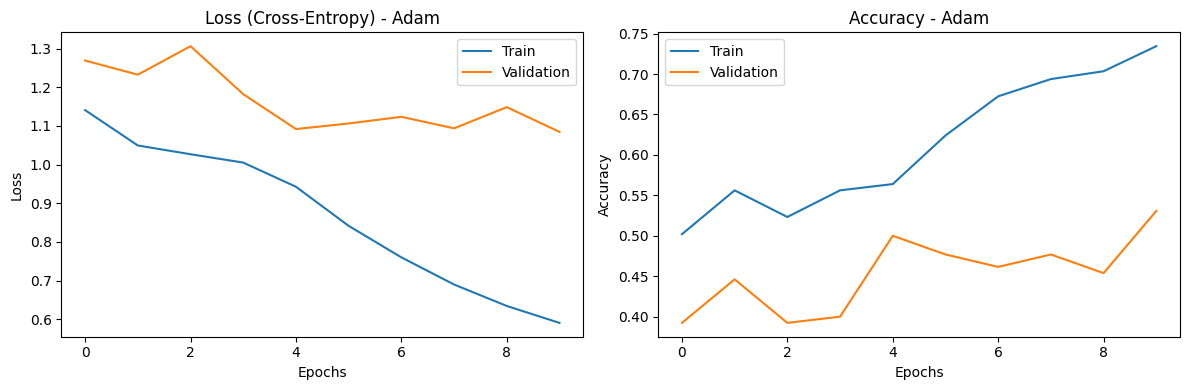

In [ ]:
# Entraînement du modèle avec l'optimiseur Adam
Entr_mod_adam = my_first_CNN.fit(images_train,labels_train, epochs=10, batch_size=32, validation_split=0.2)#one_hot_labels

# Récupération des métriques d'apprentissage
loss_train_adam = Entr_mod_adam.history['loss']
accuracy_train_adam = Entr_mod_adam.history['accuracy']
val_loss_adam = Entr_mod_adam.history['val_loss']
val_accuracy_adam = Entr_mod_adam.history['val_accuracy']

#Graphe du risque de cross-entropy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(loss_train_adam, label='Train')
plt.plot(val_loss_adam, label='Validation')
plt.title('Loss (Cross-Entropy) - Adam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#Graphe de la précision
plt.subplot(1, 2, 2)
plt.plot(accuracy_train_adam, label='Train')
plt.plot(val_accuracy_adam, label='Validation')
plt.title('Accuracy - Adam')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
print(images_test.shape,labels_test.shape)

(162, 128, 128, 1) (162, 4)


In [ ]:
# Évaluation du modèle sur l'échantillon de test
test_loss, test_accuracy = my_first_CNN.evaluate(images_test,labels_test)

print(f"Risque de Cross-Entropy sur l'échantillon de test : {test_loss}")
print(f"Précision sur l'échantillon de test : {test_accuracy}")

6/6 [==============================] - 3s 438ms/step - loss: 1.2990 - accuracy: 0.4815
Risque de Cross-Entropy sur l'échantillon de test : 1.2989596128463745
Précision sur l'échantillon de test : 0.48148149251937866


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

#Prédictions sur l'échantillon de test
predictions = np.argmax(my_first_CNN.predict(images_test), axis=1)

#Conversion des étiquettes réelles
vrai_labels = np.argmax(labels_test, axis=1)

#Rapport de classification
rapport = classification_report(vrai_labels, predictions, zero_division=0)
print("Rapport de classification:")
print(rapport)

#Matrice de confusion
mat_confusion = confusion_matrix(vrai_labels, predictions)
print("\nMatrice de confusion:")
print(mat_confusion)


6/6 [==============================] - 3s 454ms/step
Rapport de classification:
              precision    recall  f1-score   support

           0       0.38      0.38      0.38        37
           1       0.36      0.31      0.33        48
           2       0.54      0.61      0.57        41
           3       0.65      0.67      0.66        36

    accuracy                           0.48       162
   macro avg       0.48      0.49      0.49       162
weighted avg       0.47      0.48      0.48       162


Matrice de confusion:
[[14 18  3  2]
 [16 15 10  7]
 [ 4  8 25  4]
 [ 3  1  8 24]]


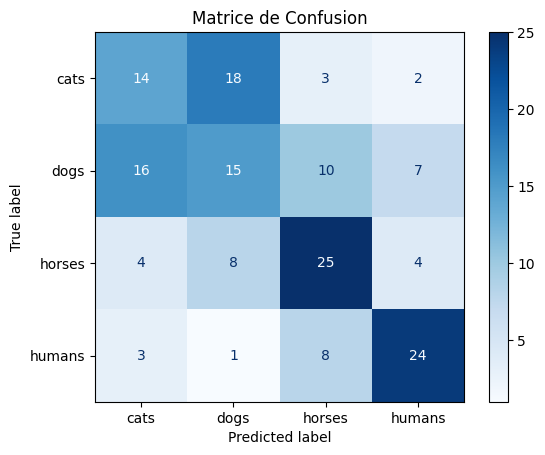

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Création de l'objet ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix=mat_confusion, display_labels=names)

#Matrice de confusion
cm_display.plot(cmap=plt.cm.Blues)
plt.title("Matrice de Confusion")
plt.show()


In [ ]:
# Sauvegarde de l'architecture du réseau au format JSON
architecture_json = my_first_CNN.to_json()
with open('architecture.json', 'w') as json_file:
    json_file.write(architecture_json)


In [ ]:
with open('architecture.json', 'r') as json_file:
    Sauvegarde = json_file.read()

print(Sauvegarde)


{"class_name": "Sequential", "config": {"name": "sequential_4", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 128, 128, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_14_input"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Conv2D", "config": {"name": "conv2d_14", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 128, 128, 1], "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "linear", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint"

In [ ]:
import os

# Taille du fichier en octets
taille = os.path.getsize('architecture.json')

# Conversion en kilo-octets (1 Ko = 1024 octets)
taille_kb = taille / 1024

print(f"La taille du fichier JSON est de {taille_kb:.2f} Ko")


La taille du fichier JSON est de 6.37 Ko


In [ ]:
# Sauvegarde du modèle complet
my_first_CNN.save('mon_model')#sauvegarde sur mon ordinateur

In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model('/content/mon_model')#après avoir uploader mon_model dans Colab

In [ ]:
import shutil

#Taille du répertoire en octets
dir_size = shutil.disk_usage('mon_model').used

# Conversion en méga-octets (1 Mo = 1024 * 1024 octets)
dir_size_mb = dir_size / (1024 * 1024)

print(f"La taille du répertoire du modèle est de {dir_size_mb:.2f} Mo")

La taille du répertoire du modèle est de 27798.16 Mo


In [ ]:
#Poids du modèle original
original = my_first_CNN.get_weights()

#Poids du modèle chargé
charge = loaded_model.get_weights()

# Vérification de l'égalité des poids
verif = all([np.array_equal(w1, w2) for w1, w2 in zip(original, charge)])

if verif:
    print("Les poids du réseau original et du réseau chargé sont identiques.")
else:
    print("Les poids du réseau original et du réseau chargé ne sont pas identiques.")

Les poids du réseau original et du réseau chargé sont identiques.


In [ ]:
from tensorflow.keras.models import load_model

# Chargement du modèle complet
chargement_model = load_model('/content/mon_model')

#Prédictions
predictions = chargement_model.predict(images_test)

# Calcul d'un score (par exemple, la précision)
test_loss, test_accuracy = chargement_model.evaluate(images_test, labels_test)

print(f"Prédictions : {predictions}")
print(f"Précision : {test_accuracy}")

6/6 [==============================] - 4s 663ms/step - loss: 1.2990 - accuracy: 0.4815
Prédictions : [[3.18004698e-01 2.57697791e-01 3.79920840e-01 4.43766080e-02]
 [3.62490088e-01 4.13450688e-01 8.00711140e-02 1.43988118e-01]
 [4.96365756e-01 1.07340902e-01 3.32289428e-01 6.40039518e-02]
 [7.53443003e-01 2.17414975e-01 1.30794721e-03 2.78341249e-02]
 [2.47093886e-01 4.33855146e-01 2.42629737e-01 7.64211863e-02]
 [7.42545080e-06 1.56496253e-06 9.72195267e-06 9.99981225e-01]
 [2.85743386e-01 5.31257272e-01 9.22675654e-02 9.07317773e-02]
 [1.15739256e-01 6.04718700e-02 1.51406810e-01 6.72381938e-01]
 [6.58285338e-04 1.13062386e-03 9.94601905e-01 3.60904681e-03]
 [1.60064518e-01 7.62747675e-02 6.45249486e-01 1.18411154e-01]
 [6.12816989e-01 2.95586109e-01 1.07658627e-02 8.08310732e-02]
 [5.86136580e-01 2.81827182e-01 2.10203398e-02 1.11015953e-01]
 [6.03356659e-02 1.76098421e-01 7.35722482e-01 2.78433822e-02]
 [1.36652784e-02 5.44000231e-03 5.95964193e-02 9.21298206e-01]
 [1.93749800e-01 